<a href="https://colab.research.google.com/github/H2IA/escola-de-verao-2021/blob/main/notebooks/conjunto%20de%20dados/H2IA_1a_Escola_de_Ver%C3%A3o_Baixar_Imagens_do_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

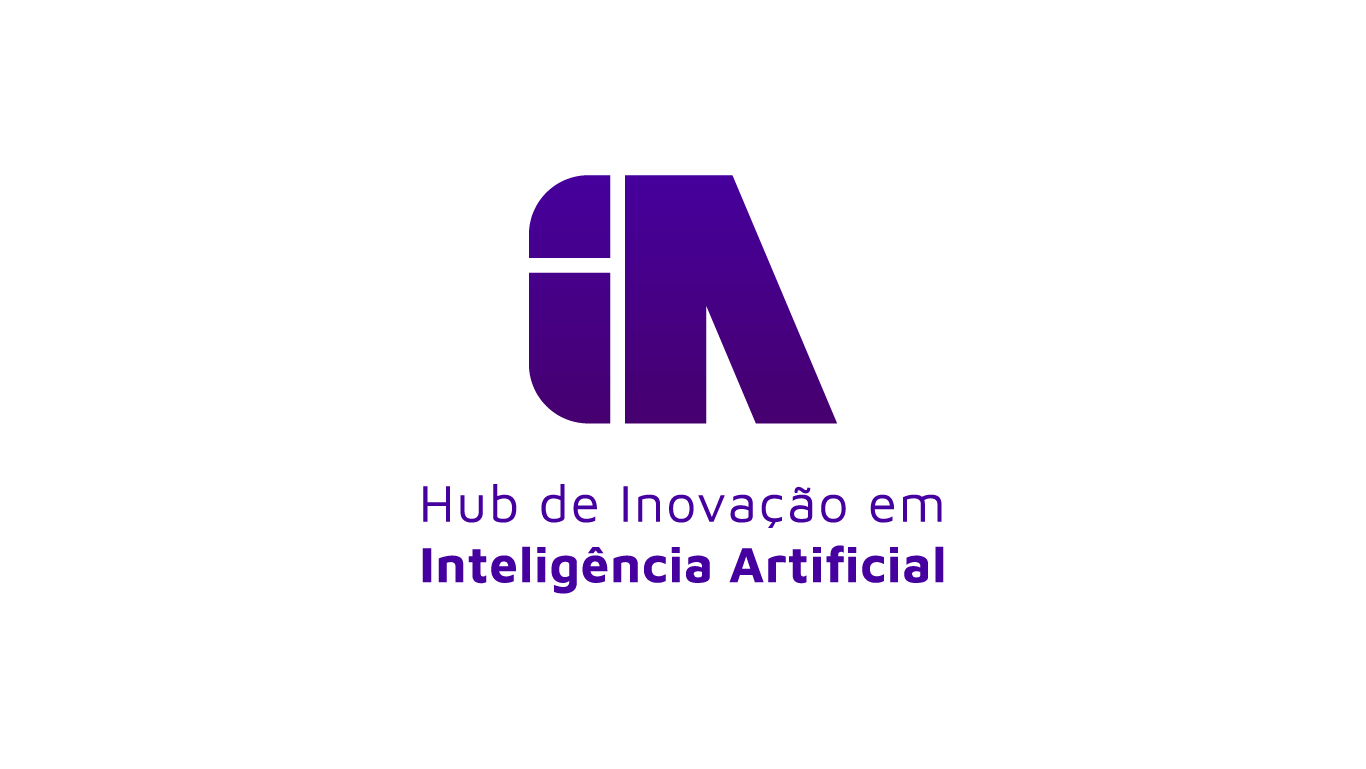


# Instalar Dependências 

In [2]:
!pip -qqq install gids
# !pip -qqq install selenium 
!apt update > /dev/null# to update ubuntu to correctly run apt install
!apt -qq install chromium-chromedriver


     |████████████████████████████████| 163kB 10.1MB/s 
     |████████████████████████████████| 911kB 13.8MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 133kB 22.3MB/s 
     |████████████████████████████████| 112kB 25.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


E: The update command takes no arguments
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension adobe-flashplugin
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 81.0 MB of archives.
After this operation, 273 MB of additional disk space will be used.
Selecting previously unselected package chromi

# Importando Bibliotecas

In [3]:
import sys
from selenium import webdriver
from gids import builder
import os

# Configurando o Crawler

In [4]:
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
config = {
    'driver_path': '/usr/lib/chromium-browser/chromedriver',
    'headless': True,
    'window-size': '720x480',
    'disable_gpu': False
}


cp: '/usr/lib/chromium-browser/chromedriver' and '/usr/bin/chromedriver' are the same file


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


# Termos de Busca


Dicionário contendo a configuração da Busca
```
ninho = {
    'keyword': 'ninho doces de pelotas',
    'limit': 200, # The number of images
    'download_context': './data',
    'path': 'doces' 
}
```
`keyword` termo de busca
`limit` quantas imagens baixar
`download_context` pasta onde os resultados serão salvos
`path` pasta interna 

O caminho dos arquivos baixados será, no exemplo:

`data/doces/ninho doces de pelotas`



In [5]:
NUMERO_DE_IMAGENS = 200

ninho = {
    'keyword': 'ninho doces de pelotas',
    'limit': NUMERO_DE_IMAGENS, # The number of images
    'download_context': './data',
    'path': 'doces' 
}

quindim = {
    'keyword': 'quindim doces de pelotas',
    'limit': NUMERO_DE_IMAGENS, 
    'download_context': './data',
    'path': 'doces' 
}

olho_de_sogra = {
    'keyword': '"olho de sogra" doces de pelotas',
    'limit': NUMERO_DE_IMAGENS, 
    'download_context': './data',
    'path': 'doces' 
}


# Baixar Imagens

In [6]:
items = [olho_de_sogra, quindim, ninho]

downloader = builder.build(config)

downloader.download(items)

Loading Pages. This may take a few moments...
Page Scroll done...
Start to downloading
"olho de sogra" doces de pelotas download completed. [Successful count = 200].
Loading Pages. This may take a few moments...
Page Scroll done...
Start to downloading
quindim doces de pelotas download completed. [Successful count = 200].
Loading Pages. This may take a few moments...
Page Scroll done...
Start to downloading
ninho doces de pelotas download completed. [Successful count = 200].
Total time is 138.46979880332947 seconds.


# Renomeando
A biblioteca salva os dados em uma estrutura dependente da string de busca, não queremos esse viés. Além disso, os arquivos são sempre renomeados na ordem em que foram carregados, teríamos arquivos diferentes com o mesmo nome.

Renomearemos os arquivos para a hash dos mesmos. Esse processo ainda removerá duplicatas que possam ter sido retornadas na busca.

In [12]:
import glob, hashlib, shutil
from PIL import Image

path_tudo_junto = 'conjunto_de_dados'
os.makedirs(path_tudo_junto,exist_ok=True)

for file in glob.glob("data/*/*/*"):
  extension = '.' + file.split('.')[-1]
  md5hash = hashlib.md5(Image.open(file).tobytes())
  fname = str(md5hash.hexdigest())+extension
  dest_fname = os.path.join(path_tudo_junto,fname)
  shutil.copy(file, dest_fname)


# Montar Google Drive para armazenar os dados 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Compactar os dados e copiar para o Google Drive

In [9]:
!tar cvzf dataset_raw_h2ia.tar.gz {path_tudo_junto}

conjunto_de_dados/
conjunto_de_dados/99fa66d3d3d01d7d44ee5c279c87b610.jpg
conjunto_de_dados/68633029d6263c82f789eaf827bd6999.jpg
conjunto_de_dados/42f8c96d7dc97350d83f85bfc22a1bf0.jpg
conjunto_de_dados/76119fd43bff8cb0fd8251cc1e1c264d.jpg
conjunto_de_dados/01fdb5cb8f0c20387553da4304c08776.jpg
conjunto_de_dados/9f39205e7ab9c85f26ada0c4c0f33c67.jpg
conjunto_de_dados/97532b8c1361157c4d9fa87232c6439b.jpg
conjunto_de_dados/a32f4c5b503fe8f49d34b35b233ec91e.jpg
conjunto_de_dados/1ded9730ff1a49c09d79952749b7c25c.jpg
conjunto_de_dados/6c2a080774d4ab579610268994a75aaf.jpg
conjunto_de_dados/1fcb2d048297071827bfc4aeba20e9ca.jpg
conjunto_de_dados/42fc936b2d00e02ada4fb536d41301b6.jpg
conjunto_de_dados/e13b24c4468ce90bad6e2f95593a5856.jpg
conjunto_de_dados/904a6608286dcc587f979fcfe28195f7.jpg
conjunto_de_dados/4ef1610c64ea3ff49ae0d626d2040d96.jpg
conjunto_de_dados/7f27fa79968a651fe12972a7ad9af5a6.jpg
conjunto_de_dados/a029374a683137644dfbc474ee6004f4.jpg
conjunto_de_dados/02fbdd0b81e5b36b2d6b081dd165

In [10]:
# !cp dataset_raw_h2ia.tar.gz drive/MyDrive/H2IA/


# Ou baixar o arquivo compactado para o seu computador 

In [11]:
from google.colab import files
files.download('dataset_raw_h2ia.tar.gz') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Anotação

Após descompactar o arquivo em seu computador, acesse o website https://www.makesense.ai e envie os dados para realizar a anotação.

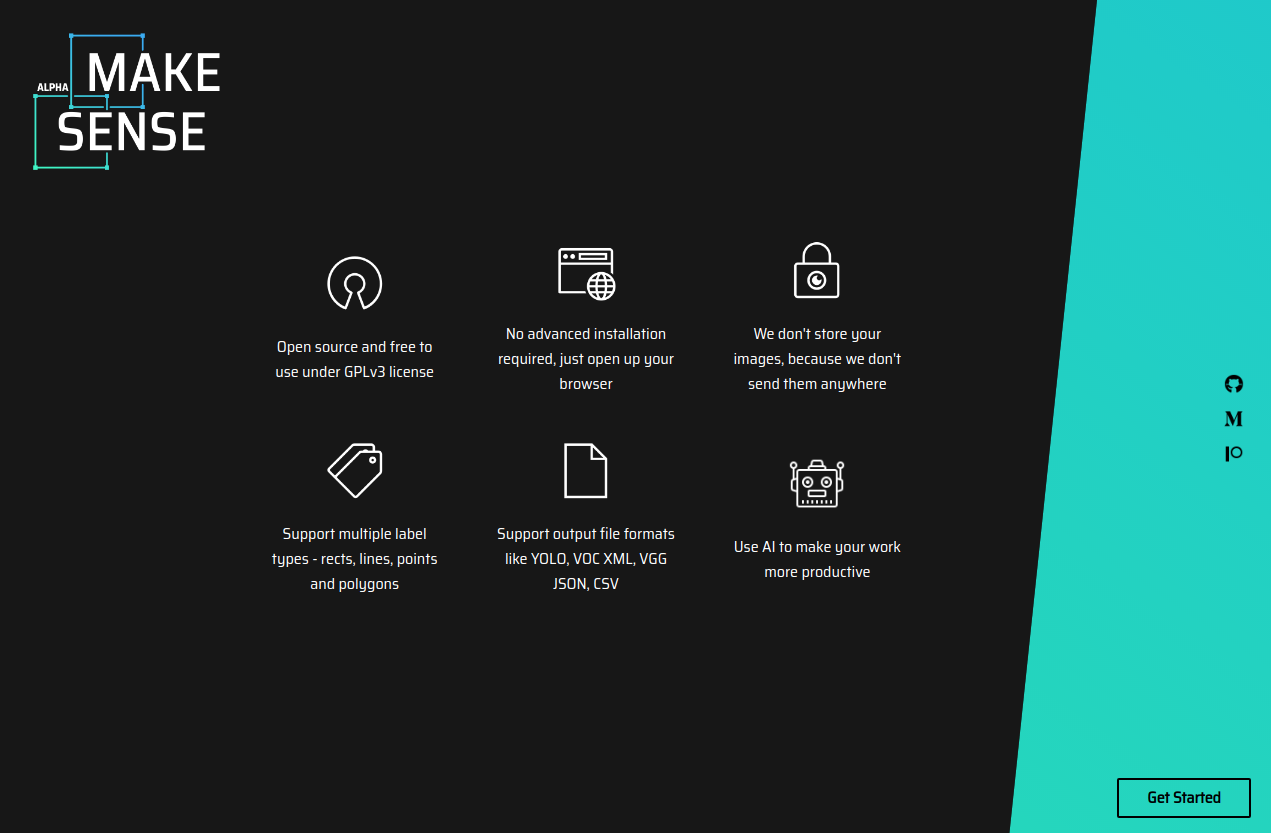

Clique em **Get Started** e arraste a pasta descompactada para aárea indicada no Navegador.

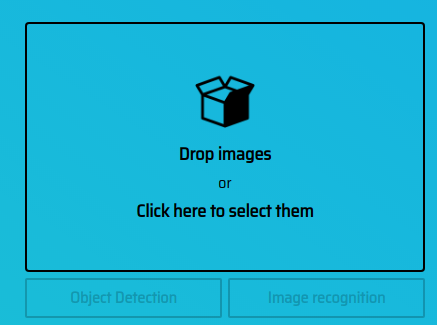

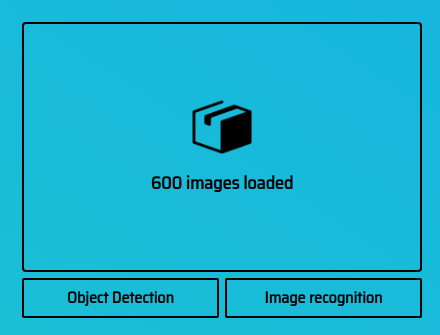

Clique em **Image Recognition**

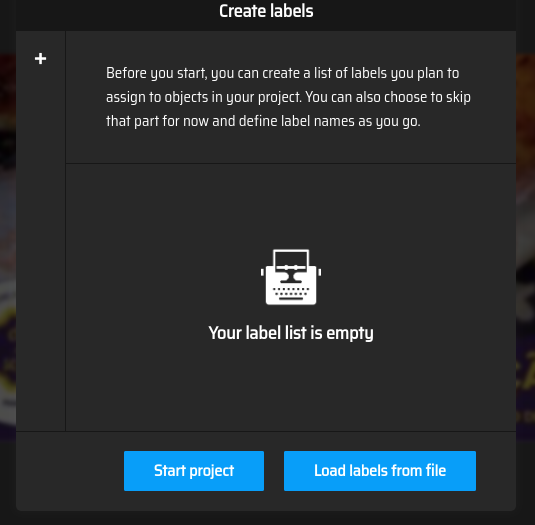

Além das imagens, precisamos dos rótulos. Clicando no botão **+** nós adicionaremos 4 rótulos:


*   ninho
*   olho de sogra
*   quindim
*   nenhum



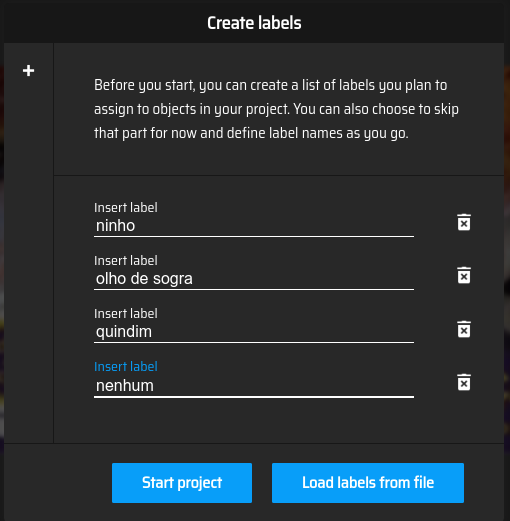

# Clique em Start Project
 

# Rotulagem

Observe a figura exibida e clique em um dos rótulos.

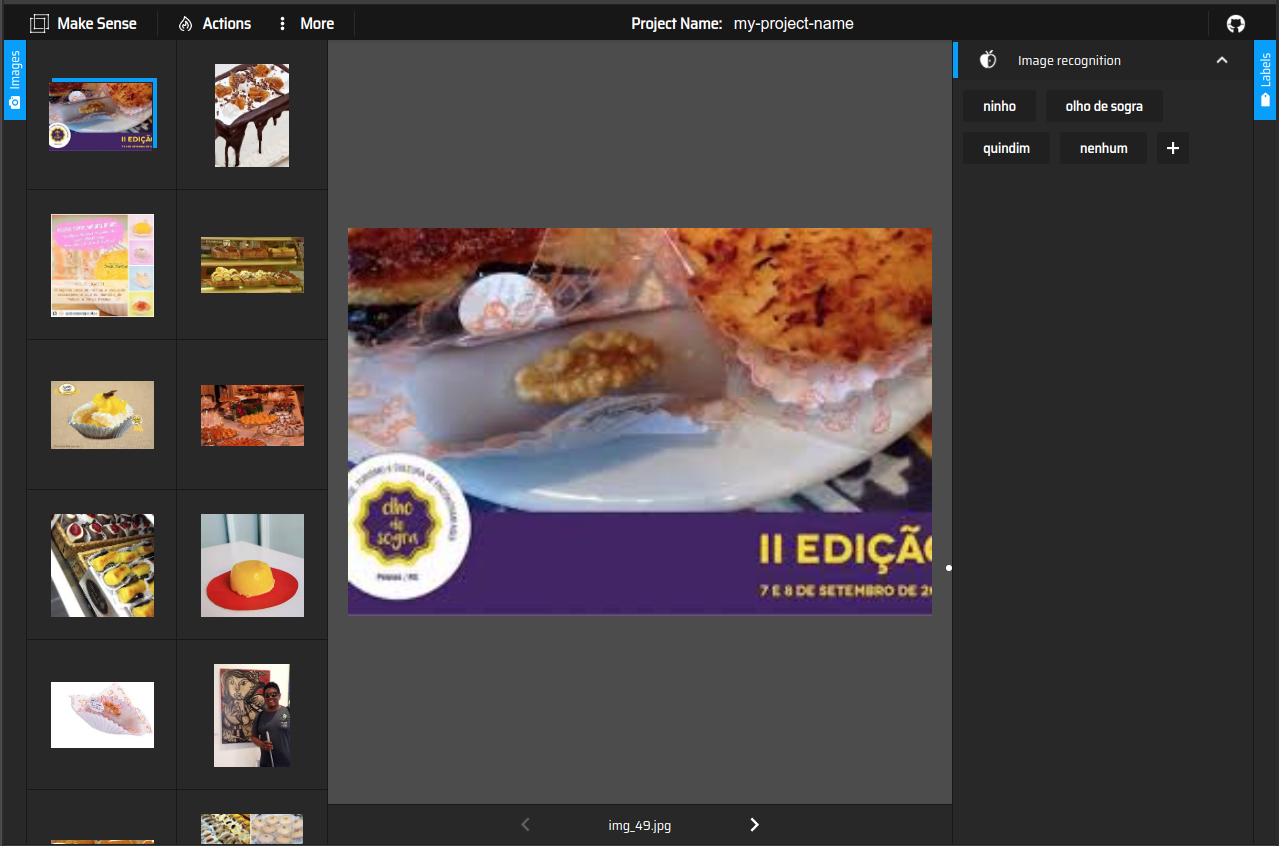

# Rótulos

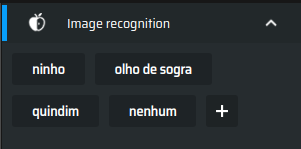

# Exportar Dados
Após anotar o conjunto de dados, clique em **Actions** e depois em **Export Annotations**.


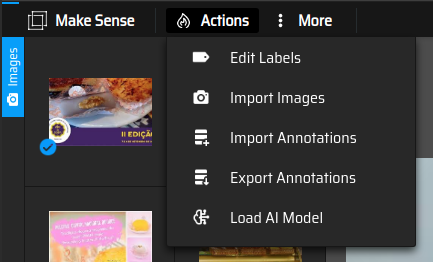

Selecione o formato de exportação

Os formatos disponíveis são csv ou json, utilizaremos o formato **csv**.

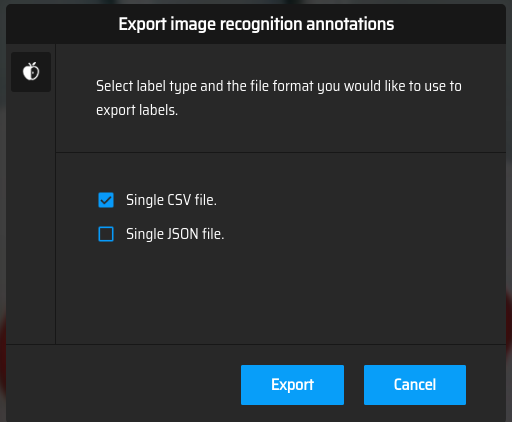

# Arquivo de rótulos
Um arquivo CSV será salvo
```

99fa66d3d3d01d7d44ee5c279c87b610.jpg,"[quindim]"
68633029d6263c82f789eaf827bd6999.jpg,"[olho de sogra]"
42f8c96d7dc97350d83f85bfc22a1bf0.jpg,"[nenhum]"
76119fd43bff8cb0fd8251cc1e1c264d.jpg,"[nenhum]"
01fdb5cb8f0c20387553da4304c08776.jpg,"[quindim]"
97532b8c1361157c4d9fa87232c6439b.jpg,"[quindim]"
a32f4c5b503fe8f49d34b35b233ec91e.jpg,"[nenhum]"
1ded9730ff1a49c09d79952749b7c25c.jpg,"[nenhum]"
6c2a080774d4ab579610268994a75aaf.jpg,"[nenhum]"
1fcb2d048297071827bfc4aeba20e9ca.jpg,"[quindim]"
42fc936b2d00e02ada4fb536d41301b6.jpg,"[ninho]"
e13b24c4468ce90bad6e2f95593a5856.jpg,"[nenhum]"
904a6608286dcc587f979fcfe28195f7.jpg,"[ninho]"
4ef1610c64ea3ff49ae0d626d2040d96.jpg,"[quindim]"
```

# Tarefa

Reproduzir esse processo para um conjunto de dados de pássaros típicos do Rio Grande do Sul.

*   João de Barro
*   Cardeal
*   Sabiá

**Dica**, para reduzir o ruído da busca do Google adicione o termo "passaro".

400 imagens de cada pássaro.

Enviar o arquivo CSV nomeado como descrito a seguir:
**NomeSobrenome_Passaros.csv**

enviar para: h2ia@inf.ufpel.edu.br